**IMPORTING**

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [100]:
tf.__version__

'2.17.0'

**DATA PRE-PROCESSING**

In [101]:
df = pd.read_csv("Student.csv")
X = df.iloc[:,1:-1].values
Y = df.iloc[:,-1].values

In [102]:
df

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [103]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [105]:
print(X)

[[17.          1.          0.         ...  1.          0.
   2.92919559]
 [18.          0.          0.         ...  0.          0.
   3.04291483]
 [15.          0.          2.         ...  0.          0.
   0.11260225]
 ...
 [16.          1.          0.         ...  0.          1.
   1.14233288]
 [16.          1.          1.         ...  1.          0.
   1.80329676]
 [16.          1.          0.         ...  0.          1.
   2.14001388]]


In [106]:
print(Y)

[2. 1. 4. ... 2. 1. 1.]


In [107]:
df.drop_duplicates()
df = df.drop(columns = ['StudentID'])
df['Extra_Activities'] = df['Extracurricular'] + df['Sports'] + df['Music'] + df['Volunteering']
df = df.drop(columns = ['Extracurricular','Sports','Music','Volunteering'])

In [108]:
df

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,GPA,GradeClass,Extra_Activities
0,17,1,0,2,19.833723,7,1,2,2.929196,2.0,1
1,18,0,0,1,15.408756,0,0,1,3.042915,1.0,0
2,15,0,2,3,4.210570,26,0,2,0.112602,4.0,0
3,17,1,0,3,10.028829,14,0,3,2.054218,3.0,1
4,17,1,0,2,4.672495,17,1,3,1.288061,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...
2387,18,1,0,3,10.680555,2,0,4,3.455509,0.0,1
2388,17,0,0,1,7.583217,4,1,4,3.279150,4.0,1
2389,16,1,0,2,6.805500,20,0,2,1.142333,2.0,1
2390,16,1,1,0,12.416653,17,0,2,1.803297,1.0,2


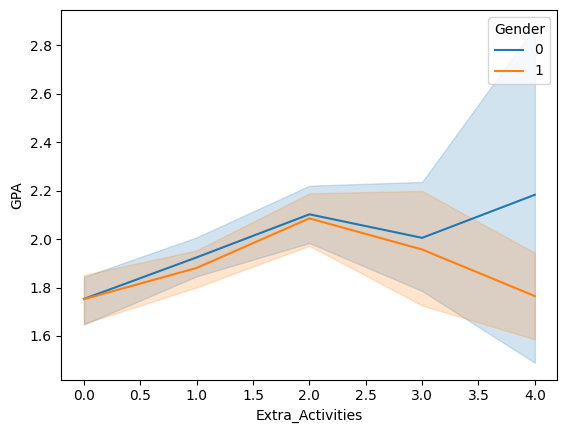

In [109]:
sns.lineplot(x='Extra_Activities', y='GPA', data=df, hue='Gender')
plt.show()

Splitting into Training Set and Test Set

In [110]:
X = df.drop('GPA', axis=1)
y = df['GPA']

In [111]:
threshold = 2.5
y = y.apply(lambda x: 1 if x > threshold else 0)

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Feature Scaling

In [113]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**BUILDING THE ANN**

In [114]:
ann = tf.keras.models.Sequential()

In [115]:
ann.add(tf.keras.layers.Dense(units=12, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

**TRAINING THE ANN**

In [116]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Training the ANN

In [117]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100, validation_split = 0.2)

Epoch 1/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3396 - loss: 1.2428 - val_accuracy: 0.4987 - val_loss: 0.8071
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5178 - loss: 0.8268 - val_accuracy: 0.6345 - val_loss: 0.6282
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6816 - loss: 0.6197 - val_accuracy: 0.7885 - val_loss: 0.5230
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8214 - loss: 0.5026 - val_accuracy: 0.8721 - val_loss: 0.4352
Epoch 5/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8751 - loss: 0.4129 - val_accuracy: 0.8956 - val_loss: 0.3568
Epoch 6/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8971 - loss: 0.3415 - val_accuracy: 0.9243 - val_loss: 0.2912
Epoch 7/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9133 - loss: 0.2828 - val_accuracy: 0.9347 - val_loss: 0.2402
Epoch 8/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9311 - loss: 0.2417 - val_accuracy: 0.9399 - v

**PREDICTION AND EVALUATION**

In [118]:
print(ann.predict(sc.transform([[18, 0, 0, 4, 12, 32, 1, 2, 1, 2]]))>0.5)
#FALSE - GPA is below threshold value (2.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
[[False]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [119]:
loss, accuracy = ann.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9699 - loss: 0.0785 
Test Accuracy: 0.9791


Confusion Matrix

In [120]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
[[334   5]
 [  5 135]]
0.9791231732776617


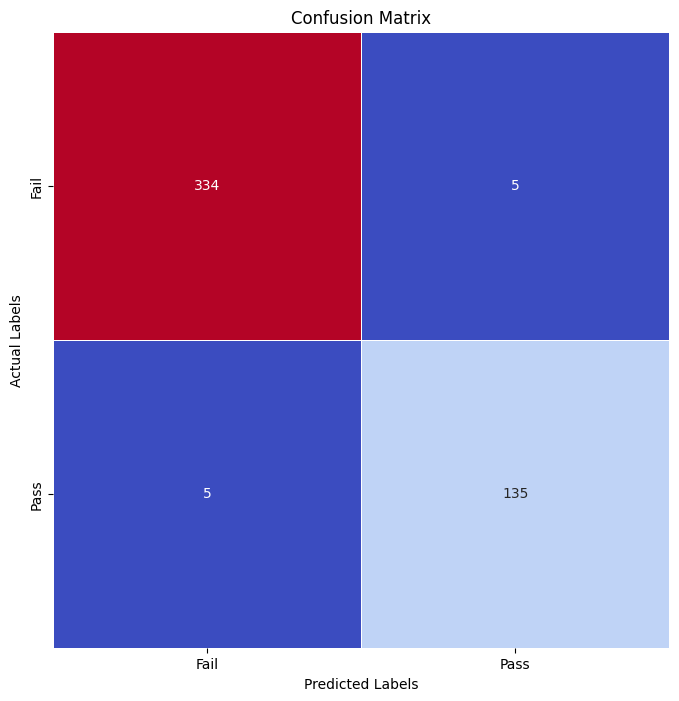

In [121]:
classes = ['Fail', 'Pass']
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=classes, yticklabels=classes, cbar=False,
    linewidths=0.5,  square=True)
plt.xlabel('Predicted Labels', fontsize=10)
plt.ylabel('Actual Labels', fontsize=10)
plt.title('Confusion Matrix')
plt.show()